# Поиск истины в вине

<img src="https://i.pinimg.com/originals/35/fd/2f/35fd2fdccb58c2250241113f12b55d14.jpg" width="300">






1.  Провести исследовательский анализ данных. Файл в зачете 3. wine_reviews.csv

2. Обработать пустые значения

3. Убрать дубликаты

4. Выполнить описательную статистику и посмотреть каждый признак отдельно.

5. Найти зависимости  цвета и рейтинга в зависимости от страны, цвета вина и сортом винограда. Сделать выводы. (Определить, какие вины лидируют по рейтингам. Построить график «ящик с усами» по рейтингам в разбивке по странам, по сортам вина. Построить диаграмму рассеяния и посчитайте корреляцию между рейтингами и ценами. )

6. Ответить на вопросы:

- Какая страна производила самое дорогое вино? Какое вино было самым дешевым?

-  Определите самый популярный сорт вина по странам 

-  Вина какой области (province) получают наилучший рейтинг? Более дорогие вина оцениваются выше?

- Определить, какие вина лидируют по рейтингам. Выберите несколько вин с наилучшим рейтингом.

- Какие винодельни производят самые дорогие/высоко оцененные вина?

- Какие винодельни/регионы/страны производят вина с самым низким рейтингом?




# 1.Провести исследовательский анализ данных. Файл в зачете 3. wine_reviews.csv

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка датасета
df=pd.read_csv('wine_reviews.csv') # читаем файл данных
color = {
    "Chardonnay": "white",
    "Pinot Noir": "red",
    "Cabernet Sauvignon": "red",
    "Red Blend": "red",
    "Bordeaux-style Red Blend": "red",
    "Sauvignon Blanc": "white",
    "Syrah": "red",
    "Riesling": "red",
    "Merlot": "red",
    "Zinfandel": "red",
    "Sangiovese": "red",
    "Malbec": "red",
    "White Blend": "white",
    "Rosé": "other",
    "Tempranillo": "red",
    "Nebbiolo": "red",
    "Portuguese Red": "red",
    "Sparkling Blend": "other",
    "Shiraz": "red",
    "Corvina, Rondinella, Molinara": "red",
    "Rhône-style Red Blend": "red",
    "Barbera": "red",
    "Pinot Gris": "white",
    "Viognier": "white",
    "Bordeaux-style White Blend": "white",
    "Champagne Blend": "other",
    "Port": "red",
    "Grüner Veltliner": "white",
    "Gewürztraminer": "white",
    "Portuguese White": "white",
    "Petite Sirah": "red",
    "Carmenère": "red"
}
country_to_continent = {
'Italy':'Europe',
'Portugal':'Europe',
'US':'North America',
'Spain':'Europe',
'France':'Europe',
'Germany':'Europe',
'Argentina':'Latin America',
'Chile':'Latin America',
'Australia': 'Oceania',
'Austria': 'Europe',
'South Africa': 'Africa',
'New Zealand': 'Oceania',
'Israel': 'Asia',
'Hungary':'Europe',
'Greece':'Europe',
'Romania':'Europe',
'Mexico':'Latin America',
'Canada':'North America',
'Turkey': 'Asia',
'Czech Republic': 'Europe',
'Slovenia': 'Europe',
'Luxembourg': 'Europe',
'Croatia': 'Europe',
'Georgia':'Europe',
'Uruguay': 'Latin America',
'England': 'Europe',
'Lebanon': 'Asia',
'Serbia': 'Europe',
'Brazil': 'Latin America',
'Moldova': 'Europe',
'Morocco':'Africa',
'Peru':'Latin America',
'India':'Asia',
'Bulgaria':'Europe',
'Cyprus': 'Europe',
'Armenia':'Asia',
'Switzerland':'Europe',
'Bosnia and Herzegovina':'Europe',
'Ukraine':'Europe',
'Slovakia':'Europe',
'Macedonia':'Europe',
'China':'Asia',
'Egypt':'Africa'
}
df  #размерность данных


,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,"With a delicate, silky mouthfeel and bright ac...",NaN,86,23.0,California,Central Coast,Central Coast,Pinot Noir,MacMurray Ranch
1,Italy,D'Alceo is a drop dead gorgeous wine that ooze...,D'Alceo,96,275.0,Tuscany,Toscana,NaN,Red Blend,Castello dei Rampolla
2,France,The great dominance of Cabernet Sauvignon in t...,NaN,91,40.0,Bordeaux,Haut-Médoc,NaN,Bordeaux-style Red Blend,Château Bernadotte
3,Italy,"The modest cherry, dark berry and black tea no...",NaN,81,15.0,Tuscany,Chianti Classico,NaN,Sangiovese,Valiano
4,US,"Exceedingly light in color, scent and flavor, ...",NaN,83,25.0,Oregon,Rogue Valley,Southern Oregon,Pinot Noir,Deer Creek
...,...,...,...,...,...,...,...,...,...,...
19995,France,"Firm wine, with tannins to match the chunky st...",Mansois,88,12.0,Southwest France,Marcillac,NaN,Mansois,Lionel Osmin & Cie
19996,US,The vineyard is on the Napa side of Carneros. ...,Estate Vineyard,89,50.0,California,Carneros,Napa-Sonoma,Pinot Noir,Bouchaine
19997,Italy,Lighea is a terrific wine and an excellent pai...,Lighea,87,20.0,Sicily & Sardinia,Sicilia,NaN,Zibibbo,Donnafugata
19998,Italy,Organically farmed Cannonau grapes deliver sma...,Le Sabbie,87,NaN,Sicily & Sardinia,Cannonau di Sardegna,NaN,Cannonau,Meloni


In [2]:
sns.set()# выполняет настройку стиля графиков по умолчанию

In [3]:
df.dtypes #тип данных

country         object
description     object
designation     object
points           int64
price          float64
province        object
region_1        object
region_2        object
variety         object
winery          object
dtype: object

# 2.Обработать пустые значения

In [4]:
df.isna().sum() # количество пропущенных значений 

country            0
description        0
designation     6001
points             0
price           1802
province           0
region_1        3457
region_2       11942
variety            0
winery             0
dtype: int64

In [5]:
df.dropna(axis='index',subset=['price'],inplace=True)
df.drop(columns=['designation','region_1','region_2'],inplace=True)
df.columns

Index(['country', 'description', 'points', 'price', 'province', 'variety',
       'winery'],
      dtype='object')

<Axes: >

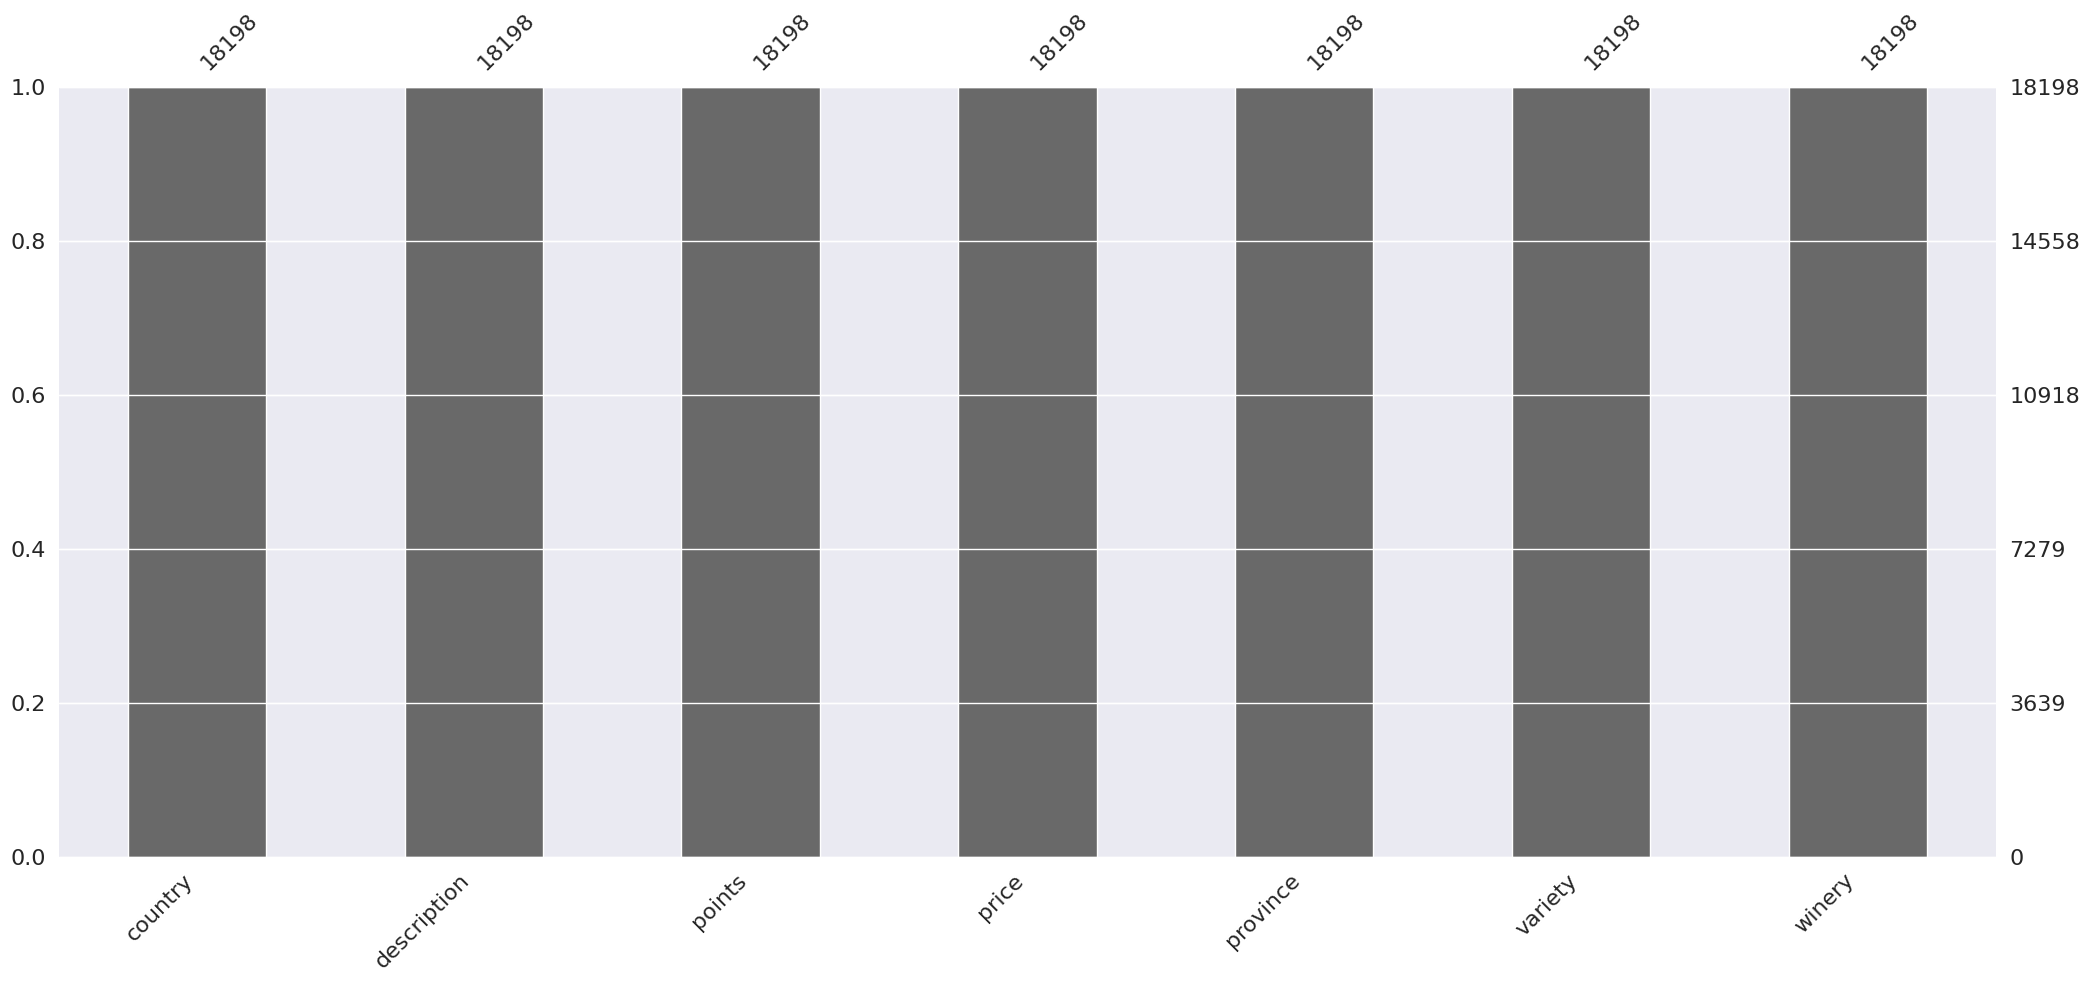

In [6]:
msno.bar(df)

# 3.Убрать дубликаты

In [7]:
df.drop_duplicates(inplace=True)

# 4.Выполнить описательную статистику и посмотреть каждый признак отдельно.

In [8]:
df.dtypes #тип данных

country         object
description     object
points           int64
price          float64
province        object
variety         object
winery          object
dtype: object

<Axes: >

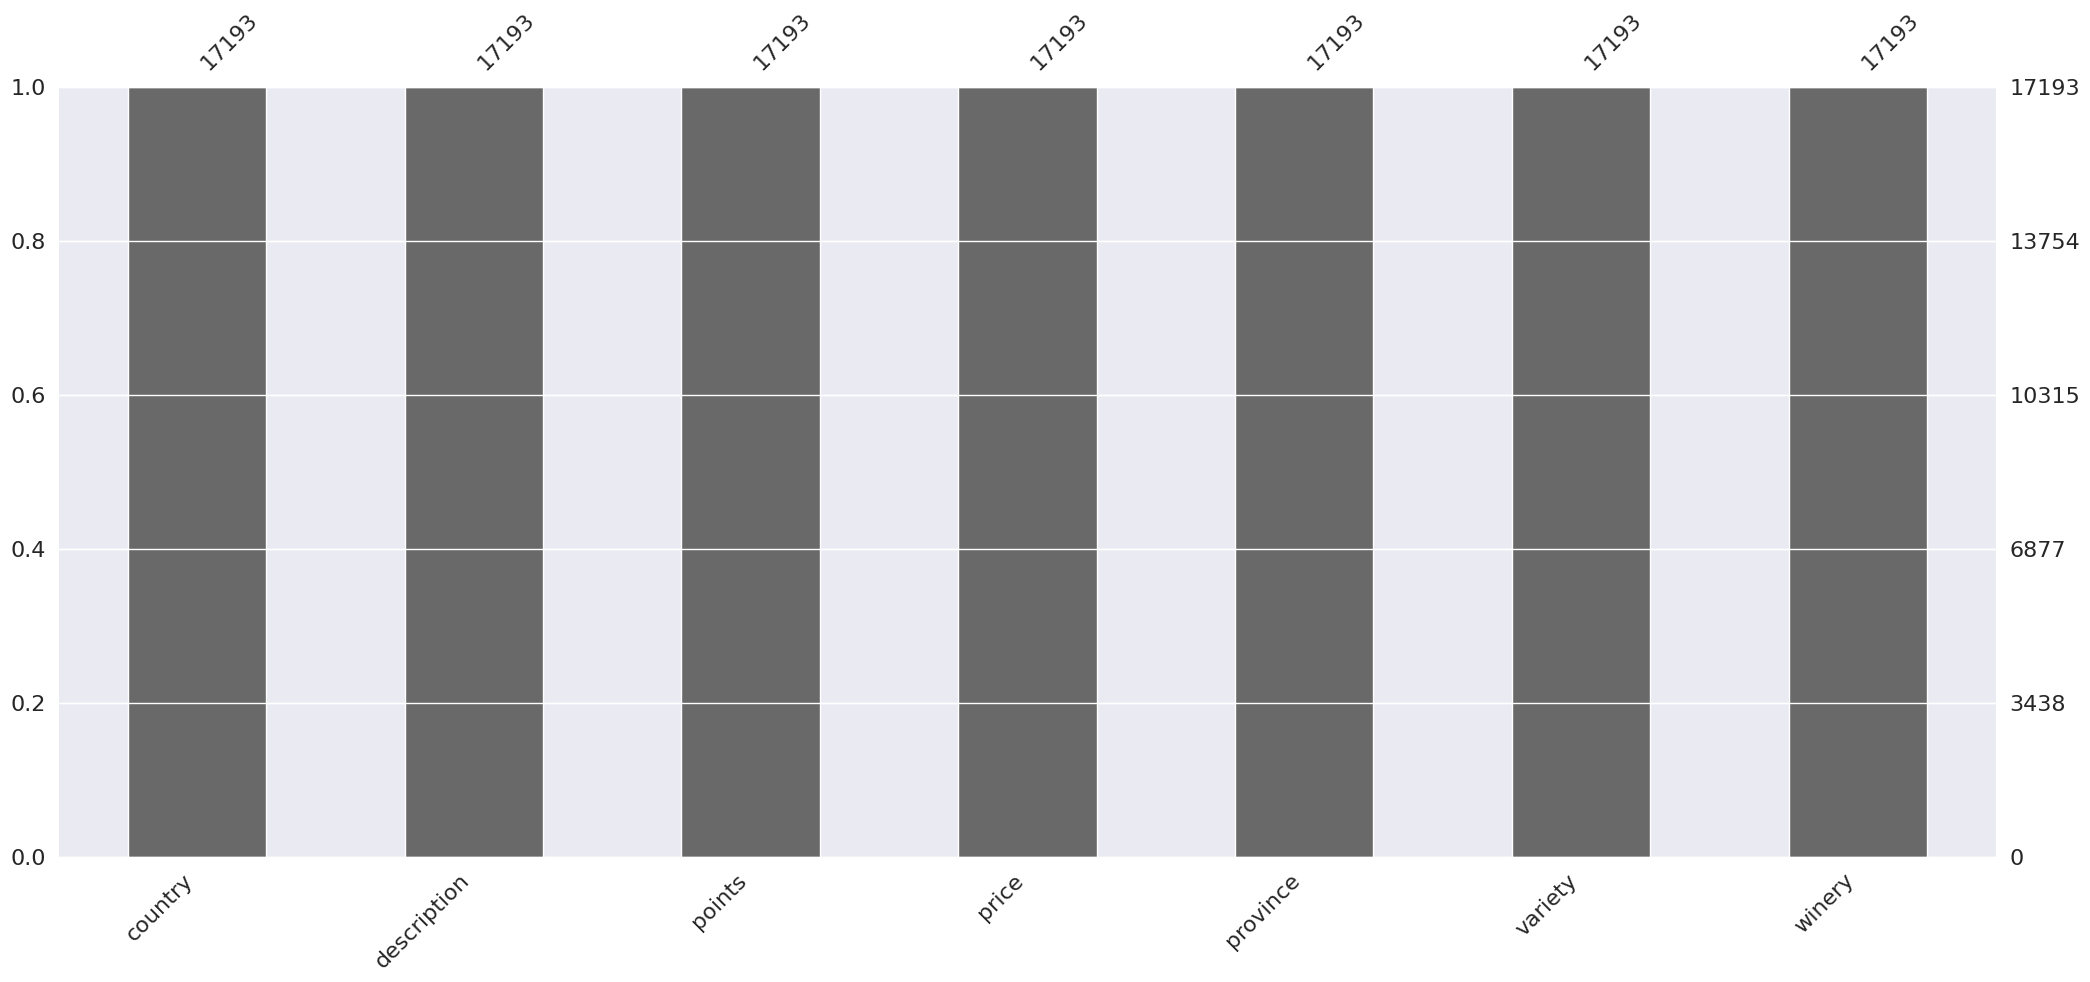

In [9]:
msno.bar(df)

# 5.Найти зависимости цвета и рейтинга в зависимости от страны, цвета вина и сортом винограда.
# I.Сделать выводы. (Определить, какие вины лидируют по рейтингам.
   # II.Построить график «ящик с усами» по рейтингам в разбивке по          странам,
   # по сортам вина. 
   # III.Построить диаграмму рассеяния и посчитайте корреляцию между рейтингами и ценами. )

<h1 style="color:blue;">Зависимости цвета и рейтинга в зависимости от страны</h1>

In [10]:
#На основе словаря `color` создайте переменную,
#в которой закодирован цвет вина
df['color']=df['variety'].map(color)

In [11]:
#На основе словаря `country_to_continent` создайте переменную,принадлежности страны континенту

df['country_to_continent']=df['country'].map(country_to_continent)

In [12]:
df['color'].fillna("other1",inplace=True)   
# df.dropna(axis='index',subset=['color'],inplace=True)

In [13]:
df['country_to_continent'].fillna("Unknown",inplace=True)

In [14]:
# Получение уникальных значений столбца 'country' и 'color'
unique_country = df['country'].unique()
unique_color = df['color'].unique()
print(*unique_country)
print(*unique_color)
df.groupby(['country','color'])['points'].describe()

US Italy France Austria Chile Spain Australia South Africa New Zealand Portugal Argentina Germany Greece Canada Israel Romania Croatia Hungary Mexico Slovenia Lebanon China Bulgaria Cyprus Switzerland Turkey Georgia Moldova Uruguay Montenegro Serbia South Korea Ukraine Bosnia and Herzegovina Brazil US-France Luxembourg
red white other1 other


count       mean       std   min    25%   50%    75%   max
country   color                                                             
Argentina other    10.0  83.600000  1.897367  80.0  83.00  83.5  84.75  87.0
          other1  102.0  85.745098  3.039953  80.0  84.00  86.0  87.00  94.0
          red     489.0  86.670757  3.377236  80.0  84.00  87.0  89.00  97.0
          white    79.0  84.088608  2.045570  80.0  83.00  84.0  85.00  89.0
Australia other    14.0  84.857143  2.537629  81.0  84.00  84.0  86.50  89.0
...                 ...        ...       ...   ...    ...   ...    ...   ...
US-France white     1.0  88.000000       NaN  88.0  88.00  88.0  88.00  88.0
Ukraine   other     1.0  86.000000       NaN  86.0  86.00  86.0  86.00  86.0
Uruguay   other1    2.0  85.500000  3.535534  83.0  84.25  85.5  86.75  88.0
          red       4.0  85.250000  2.217356  82.0  85.00  86.0  86.25  87.0
          white     1.0  84.000000       NaN  84.0  84.00  84.0  84.00  84.0

[107 rows x 8 columns]

<h1 style="color:blue;">Зависимости цвета вина и сорта винограда.</h1>

In [15]:
# Получение уникальных значений столбца 'variety'
unique_variety = df['variety'].unique()
#print(*unique_variety)
df.groupby(['color','variety'])['points'].describe()

count       mean       std   min    25%   50%    75%  \
color  variety                                                                  
other  Champagne Blend   118.0  89.745763  3.486694  81.0  87.00  90.0  92.75   
       Rosé              361.0  86.379501  2.768377  80.0  84.00  86.0  88.00   
       Sparkling Blend   238.0  87.478992  3.060153  80.0  85.00  87.0  90.00   
other1 Agiorgitiko        17.0  84.882353  2.057983  81.0  84.00  85.0  86.00   
       Aglianico          30.0  88.800000  1.936937  84.0  87.25  88.5  90.00   
...                        ...        ...       ...   ...    ...   ...    ...   
white  Pinot Gris        159.0  87.704403  2.647075  80.0  86.00  88.0  90.00   
       Portuguese White   96.0  87.010417  2.359727  83.0  85.00  87.0  89.00   
       Sauvignon Blanc   770.0  86.945455  2.711942  80.0  85.00  87.0  89.00   
       Viognier          171.0  87.438596  3.156790  80.0  85.00  88.0  90.00   
       White Blend       316.0  86.655063  2.877059  80.0  85.00  87.0  88.00   

                          max  
color  variety                 
other  Champagne Blend   97.0  
       Rosé              95.0  
       Sparkling Blend   98.0  
other1 Agiorgitiko       88.0  
       Aglianico         93.0  
...                       ...  
white  Pinot Gris        95.0  
       Portuguese White  93.0  
       Sauvignon Blanc   94.0  
       Viognier          94.0  
       White Blend       95.0  

[406 rows x 8 columns]

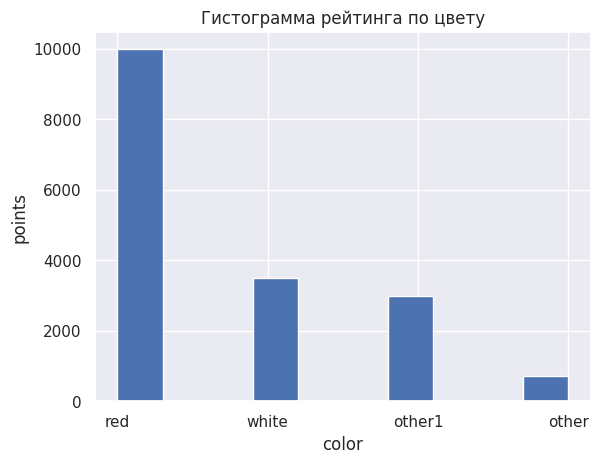

In [16]:
# Построение гистограммы по значению столбца color
plt.hist(df['color'])
plt.xlabel('color')
plt.ylabel('points')
plt.title('Гистограмма рейтинга по цвету')
plt.show()  

<h1 style="color:blue;">Лучшие рейтинги</h1>

In [17]:
# Вина какой области (`province`) получают наилучшие рейтинги? 
df.sort_values(by='points',ascending=False).head()

,country,description,points,price,province,variety,winery,color,country_to_continent
323,France,A wine that has created its own universe. It h...,100,1400.0,Champagne,Chardonnay,Krug,white,Europe
17967,US,Impossibly aromatic. Hard to imagine greater c...,100,245.0,California,Cabernet Blend,Sloan,other1,North America
5955,Italy,"A perfect wine from a classic vintage, the 200...",100,460.0,Tuscany,Merlot,Tenuta dell'Ornellaia,red,Europe
13188,France,"A big, powerful wine that sums up the richness...",99,2300.0,Bordeaux,Bordeaux-style Red Blend,Château Latour,red,Europe
9203,Italy,"Elegant and complex, this gorgeous wine is all...",99,175.0,Piedmont,Nebbiolo,Mascarello Giuseppe e Figlio,red,Europe


<h1 style="color:blue;">Рейтинги по странам</h1>

<Axes: xlabel='country', ylabel='points'>

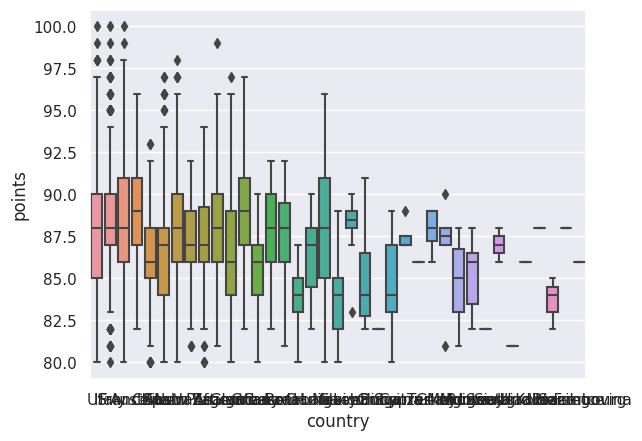

In [18]:
# Построение ящика с усами для столбца
sns.boxplot(x='country',y='points',data=df,)

<h1 style="color:blue;">Рейтинги по сортам вина</h1>

<Axes: xlabel='variety', ylabel='points'>

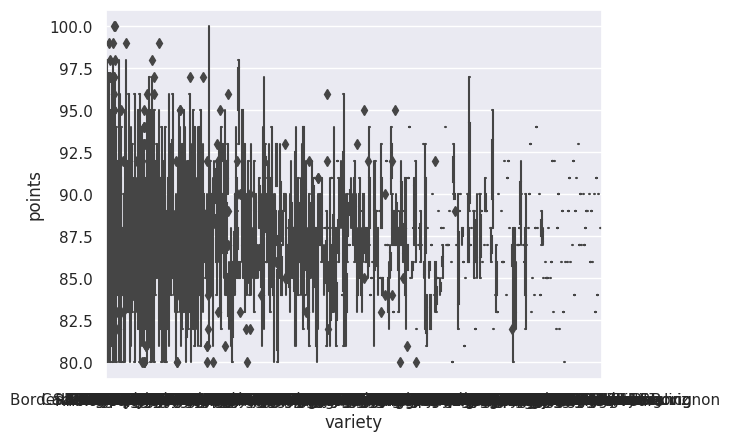

In [19]:
# Построение ящика с усами для столбца 
sns.boxplot(x='variety',y='points',data=df,)

<h1 style="color:blue;">Рейтинги по цвету вина</h1>

<Axes: xlabel='color', ylabel='points'>

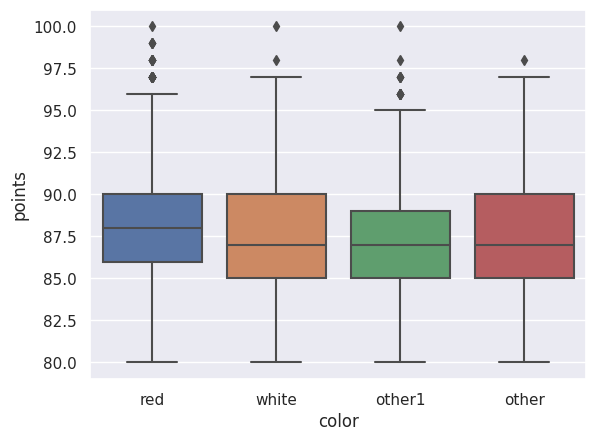

In [20]:
# Построение ящика с усами для столбца
sns.boxplot(x='color',y='points',data=df,)


<h1 style="color:blue;">Диаграмма рассеяния рейтинг и цена</h1>

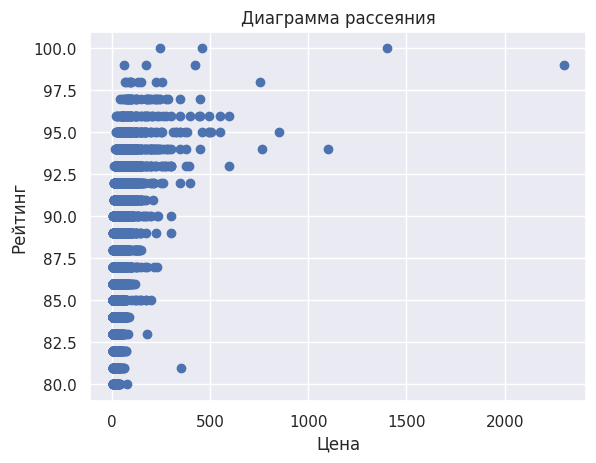

In [21]:
plt.scatter(x = df['price'], y = df['points']) # цена и рейтинг
plt.xlabel("Цена")
plt.ylabel("Рейтинг")
plt.title('Диаграмма рассеяния')
plt.show()

<h1 style="color:blue;">Корреляция между рейтингами и ценами</h1>

In [22]:
df[['points','price']].corr()

,points,price
points,1.000000,0.426109
price,0.426109,1.000000


# 6.Ответить на вопросы:
#           Какая страна производила самое дорогое вино?
#           Какое вино было самым дешевым?

<h1 style="color:blue;">Cамое дорогое вино</h1>

In [23]:
max_value = df['price'].max()  # Максимальная цена
print('Цена самого дорогого вина($):',max_value)
print('Страна:')
max_price_country = df.loc[df['price'].idxmax(), 'country']
print(max_price_country)
print('Название вина:')
max_price_variety = df.loc[df['price'].idxmax(), 'variety']
print(max_price_variety)

Цена самого дорогого вина($): 2300.0
Страна:
France
Название вина:
Bordeaux-style Red Blend


<h1 style="color:blue;">Cамое дешовое вино</h1>

In [24]:
min_value = df['price'].min()  # Максимальная цена
print('Цена самого дешового вина($):',min_value)
print('Страна:')
min_price_country = df.loc[df['price'].idxmin(), 'country']
print(min_price_country)
print('Название вина:')
min_price_variety = df.loc[df['price'].idxmin(), 'variety']
print(min_price_variety)

Цена самого дешового вина($): 5.0
Страна:
Australia
Название вина:
Cabernet Sauvignon


# Самый популярный сорт вин по странам?

<h1 style="color:blue;">Cамые популярные сорта вина по странам</h1>

In [25]:
popular_variety = df.groupby('country')['variety'].apply(lambda x: x.value_counts().idxmax())
print("Самые популярные сорта вин по странам:")
print(popular_variety)

Самые популярные сорта вин по странам:
country
Argentina                             Malbec
Australia                             Shiraz
Austria                     Grüner Veltliner
Bosnia and Herzegovina               Blatina
Brazil                       Sparkling Blend
Bulgaria                              Merlot
Canada                              Riesling
Chile                     Cabernet Sauvignon
China                             Chardonnay
Croatia                             Malvasia
Cyprus                             Red Blend
France                            Chardonnay
Georgia                          White Blend
Germany                             Riesling
Greece                             Red Blend
Hungary                               Tokaji
Israel                    Cabernet Sauvignon
Italy                              Red Blend
Lebanon                          White Blend
Luxembourg                          Riesling
Mexico                             Red Blend
Moldova 

<h1 style="color:blue;">Победитель по популярности</h1>

In [26]:
popular_type = df['variety'].value_counts().idxmax()
print("Победитель по по пулярности:", popular_type)

Победитель по по пулярности: Pinot Noir


# Вина какой области (`province`) получают наилучшие рейтинги? 
# Более дорогие вина оцениваются выше?

<h1 style="color:blue;">Лучшие рейтинги</h1>

In [27]:
# Вина какой области (`province`) получают наилучшие рейтинги? 
df.sort_values(by='points',ascending=False).head()

,country,description,points,price,province,variety,winery,color,country_to_continent
323,France,A wine that has created its own universe. It h...,100,1400.0,Champagne,Chardonnay,Krug,white,Europe
17967,US,Impossibly aromatic. Hard to imagine greater c...,100,245.0,California,Cabernet Blend,Sloan,other1,North America
5955,Italy,"A perfect wine from a classic vintage, the 200...",100,460.0,Tuscany,Merlot,Tenuta dell'Ornellaia,red,Europe
13188,France,"A big, powerful wine that sums up the richness...",99,2300.0,Bordeaux,Bordeaux-style Red Blend,Château Latour,red,Europe
9203,Italy,"Elegant and complex, this gorgeous wine is all...",99,175.0,Piedmont,Nebbiolo,Mascarello Giuseppe e Figlio,red,Europe


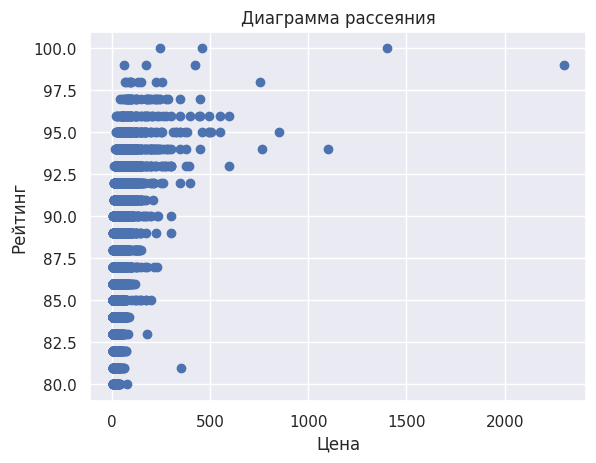

In [28]:
plt.scatter(x = df['price'], y = df['points']) # цена и рейтинг
plt.xlabel("Цена")
plt.ylabel("Рейтинг")
plt.title('Диаграмма рассеяния')
plt.show()

Из таблицы и диаграммы рассеивания видно, что дорогие вина не всегда оцениваются выше.

# Определить, какие вина лидируют по рейтингам. Выберите несколько вин с наилучшим рейтингом.

<h1 style="color:blue;">Cамые популярные сорта вина по рейтингам</h1>

In [29]:
popular_variety_points = df.groupby('points')['variety'].apply(lambda x: x.value_counts().idxmax())
print("Самые популярные сорта вин по рейтингам:")
popular_variety_points[::-1]

Самые популярные сорта вин по рейтингам:


points
100            Chardonnay
99                  Syrah
98             Pinot Noir
97              Red Blend
96             Pinot Noir
95             Pinot Noir
94             Pinot Noir
93             Pinot Noir
92             Pinot Noir
91             Pinot Noir
90             Pinot Noir
89             Pinot Noir
88             Pinot Noir
87             Chardonnay
86             Chardonnay
85             Chardonnay
84             Chardonnay
83             Chardonnay
82             Chardonnay
81     Cabernet Sauvignon
80              Zinfandel
Name: variety, dtype: object

# Какие винодельни производят самые дорогие/высоко оцененные вина?

<h1 style="color:blue;">Винодельни производящие самые дорогие вина</h1>

In [30]:
popular_winery_price = df.groupby('price')['winery'].apply(lambda x: x.value_counts().idxmax())
print("Винодельни производящие самые дорогие вина:")
popular_winery_price[::-1]

Винодельни производящие самые дорогие вина:


price
2300.0     Château Latour
1400.0               Krug
1100.0     Emmerich Knoll
850.0      Château Ausone
764.0        Royal Tokaji
               ...       
9.0            DFJ Vinhos
8.0            DFJ Vinhos
7.0            DFJ Vinhos
6.0           Funky Llama
5.0       Kelly's Revenge
Name: winery, Length: 210, dtype: object

<h1 style="color:blue;">Винодельни производящие самые высоко оцененные вина</h1>

In [31]:
popular_winery_points = df.groupby('points')['winery'].apply(lambda x: x.value_counts().idxmax())
print("Винодельни производящие самые высоко оцененные вина:")
popular_winery_points[::-1]

Винодельни производящие самые высоко оцененные вина:


points
100                     Krug
99                    Cayuse
98           Williams Selyem
97           Williams Selyem
96           Williams Selyem
95           Williams Selyem
94                    Failla
93           Williams Selyem
92                Testarossa
91        Wines & Winemakers
90            L'Ecole No. 41
89                    Montes
88     Chateau Ste. Michelle
87                     Hogue
86            Columbia Crest
85                DFJ Vinhos
84                San Simeon
83                Wellington
82          Lucas & Lewellen
81            Parkers Estate
80                Montecillo
Name: winery, dtype: object

# Какие винодельни/регионы/страны производят вина с самым низким рейтингом?

<h1 style="color:blue;">Винодельни производящие вина с самым низким рейтингом</h1>

In [32]:
popular_winery_points = df.groupby('points')['winery'].apply(lambda x: x.value_counts().idxmin())
print("Винодельни производящие вина с самым низким рейтингом:")
popular_winery_points

Винодельни производящие вина с самым низким рейтингом:


points
80                TorresManur
81                    Valiano
82         Bodegas Los Llanos
83                    Bianchi
84             Eagles Landing
85                  Thornbury
86                 Whitehaven
87                  Vallobera
88                Santa Lucia
89                    Muratie
90                      Krutz
91                 Neumeister
92                      Juris
93                    Cefalu'
94             Leeuwin Estate
95           Domaine Weinbach
96     Domaine Zind-Humbrecht
97                      Salon
98                 Vine Cliff
99                     Cayuse
100                      Krug
Name: winery, dtype: object

<h1 style="color:blue;">Регионы производят вина с самым низким рейтингом</h1>

In [33]:
popular_country_to_continent_points = df.groupby('points')['country_to_continent'].apply(lambda x: x.value_counts().idxmin())
print("Регионы производящие вина с самым низким рейтингом:")
popular_country_to_continent_points

Регионы производящие вина с самым низким рейтингом:


points
80           Oceania
81           Unknown
82           Unknown
83              Asia
84              Asia
85              Asia
86              Asia
87              Asia
88           Unknown
89              Asia
90              Asia
91              Asia
92              Asia
93     Latin America
94           Oceania
95           Oceania
96           Oceania
97     Latin America
98           Oceania
99     North America
100    North America
Name: country_to_continent, dtype: object

<h1 style="color:blue;">Страны производят вина с самым низким рейтингом</h1>

In [34]:
popular_country_points = df.groupby('points')['country'].apply(lambda x: x.value_counts().idxmin())
print("Страны производящие вина с самым низким рейтингом:")
popular_country_points

Страны производящие вина с самым низким рейтингом:


points
80          Mexico
81         Georgia
82         Austria
83        Slovenia
84         Uruguay
85          Canada
86     Switzerland
87          Mexico
88         Hungary
89         Croatia
90         Hungary
91          Israel
92          Canada
93         Hungary
94         Hungary
95       Australia
96       Australia
97         Germany
98       Australia
99              US
100         France
Name: country, dtype: object